# **Activity: Nhận diện giới tính**

**Tải data vào colab**

In [79]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [80]:
!unzip /content/gdrive/Shareddrives/nhan_dien_dac_diem_khuon_mat/gender_data.zip -d "/content"

Archive:  /content/gdrive/Shareddrives/nhan_dien_dac_diem_khuon_mat/gender_data.zip
replace /content/Training/female/131422.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Import thư viện**

In [81]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import seaborn as sn
from tensorflow.keras.datasets import mnist
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D

**Chia 2 thư mục train và test**

In [82]:
train_dir = '/content/Training'
test_dir = '/content/Validation'
categories = ["female", "male"]
img_size = 50

In [83]:
X_train_label = []
X_train_list = []
X_test_label = []
X_test_list = []

**Load data và preprocessing**

In [84]:
female_train_list = glob.glob(train_dir+"/"+categories[0]+"/*")
male_train_list = glob.glob(train_dir+"/"+categories[1]+"/*")
for name in female_train_list:
  X_train_label.append(0)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_train_list.append((img))
for name in male_train_list:
  X_train_label.append(1)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_train_list.append((img))

In [85]:
female_test_list = glob.glob(test_dir+"/"+categories[0]+"/*")
male_test_list = glob.glob(test_dir+"/"+categories[1]+"/*")
for name in female_test_list:
  X_test_label.append(0)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_test_list.append((img))
for name in male_test_list:
  X_test_label.append(1)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_test_list.append((img))

In [104]:
X_train = np.array(X_train_list)
y_train = np.array(X_train_label)
X_test = np.array(X_test_list)
y_test = np.array(X_test_label)

**Duỗi vector, chuẩn hoá input, output**

In [87]:
X_train_scaled = np.array(X_train)/255.
X_test_scaled = np.array(X_test)/255.
# OnehotVector output
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()
print(y_train.shape)

(47009, 2)


**Xây dựng mô hình CNN**

In [88]:
from tensorflow.keras.layers import BatchNormalization

inp = Input(shape = (50, 50, 1))

cnn = Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same')(inp) # Thêm padding
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

cnn = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pooling)
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

cnn = Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(pooling)
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

cnn = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same')(pooling)
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units = 512, activation = 'relu') (f)
drop = Dropout(0.2)(fc1)
fc2 = Dense(units = 256, activation = 'relu') (drop)
fc3 = Dense(units = 128, activation = 'relu') (fc2)
fc4 = Dense(units = 64, activation = 'relu') (fc3)
fc5 = Dense(units = 32, activation = 'relu') (fc4)
out = Dense(units = 2, activation = 'sigmoid') (fc5)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 50, 50, 1)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 batch_normalization_32 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 batch_normalization_33 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 25, 25, 32)       0   

**Huấn luyện mô hình**

In [89]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer1, loss='categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train_scaled,y_train,batch_size=64,
                    epochs = 25, validation_data = (X_test_scaled, y_test))

Epoch 1/25
735/735 [==============================] - 26s 25ms/step - loss: 0.1935 - accuracy: 0.9240 - val_loss: 0.1105 - val_accuracy: 0.9604
Epoch 2/25
735/735 [==============================] - 19s 25ms/step - loss: 0.1184 - accuracy: 0.9586 - val_loss: 0.3729 - val_accuracy: 0.8154
Epoch 3/25
735/735 [==============================] - 18s 25ms/step - loss: 0.1037 - accuracy: 0.9643 - val_loss: 0.1604 - val_accuracy: 0.9389
Epoch 4/25
735/735 [==============================] - 19s 26ms/step - loss: 0.0927 - accuracy: 0.9680 - val_loss: 0.1230 - val_accuracy: 0.9506
Epoch 5/25
735/735 [==============================] - 18s 25ms/step - loss: 0.0853 - accuracy: 0.9704 - val_loss: 0.0955 - val_accuracy: 0.9636
Epoch 6/25
735/735 [==============================] - 18s 24ms/step - loss: 0.0754 - accuracy: 0.9738 - val_loss: 0.1095 - val_accuracy: 0.9589
Epoch 7/25
735/735 [==============================] - 18s 25ms/step - loss: 0.0683 - accuracy: 0.9757 - val_loss: 0.1197 - val_accuracy:

**Trực quan hóa kết quả Accuracy và Loss trên tập Train và Test**

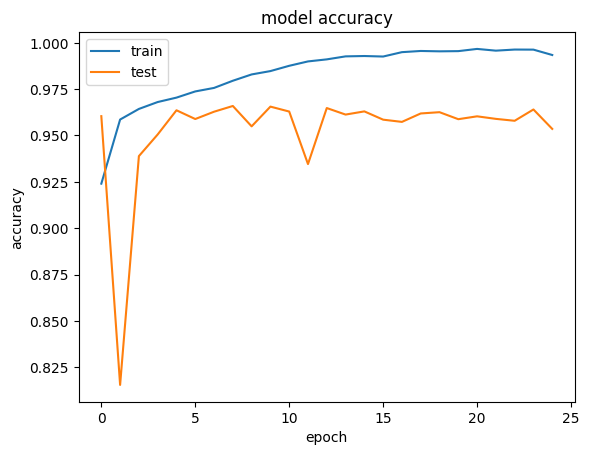

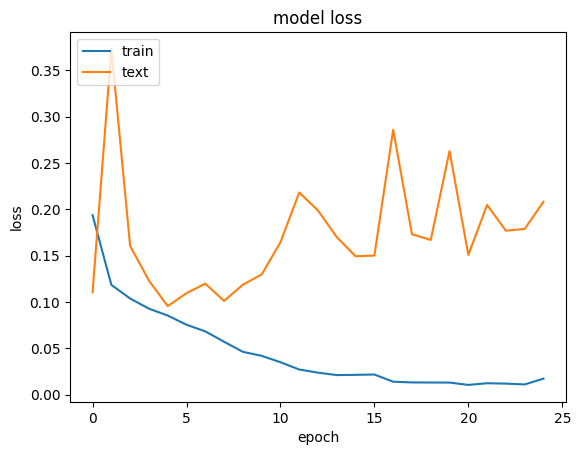

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','text'],loc='upper left')
plt.show()

**Lưu mô hình, load mô hình đã lưu từ máy**

In [97]:
model.save('model1.h5')
from tensorflow.keras.models import load_model
model1 = load_model('/content/model1.h5')

**Tính y dự đoán từ mô hình đã lưu**

In [105]:
y_hat = model1.predict(X_test_scaled)

365/365 [==============================] - 1s 4ms/step


**Lấy argmax của y dự đoán và y test**

In [107]:
# y_test = np.argmax(y_test, axis=1)
y_hat = np.argmax(y_hat, axis=1)

### **Sử dụng classification_report trong thư viện Sklearn đánh giá kết quả mô hình ban đầu dựa trên kết quả dự đoán tập test**

In [108]:
from sklearn.metrics import classification_report
target_names = ['female', 'male']
print(classification_report(y_test, y_hat,target_names=target_names))

              precision    recall  f1-score   support

      female       0.97      0.94      0.95      5841
        male       0.94      0.97      0.95      5808

    accuracy                           0.95     11649
   macro avg       0.95      0.95      0.95     11649
weighted avg       0.95      0.95      0.95     11649



### **Sử dụng Confusion_matrix trong thư viện Sklearn biểu diễn kết quả dự đoán trên tập test**

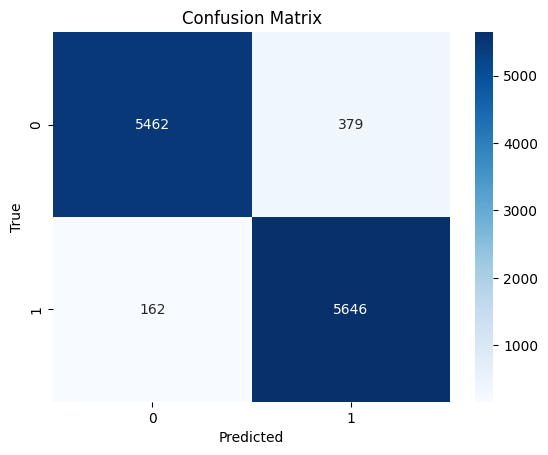

In [109]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_hat)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()